# Använder följande data från kaggle: 

https://www.kaggle.com/datasets/santoshd3/bank-customers

[Länk till data](https://www.kaggle.com/datasets/santoshd3/bank-customers)

## Vi läser in datan

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv("bank.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Undersöker antal rader och kolumner i vårt dataset

In [2]:
df.shape

(10000, 14)

## Printar ut info om vår data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Kontrollerar vilka datatyper vi har

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Vi dropar följande kolummer: RowNumber, Tenure,Exited

In [5]:
df = df.drop(columns=["RowNumber","Tenure","Exited" ])
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42,0.00,1,1,1,101348.88
1,15647311,Hill,608,Spain,Female,41,83807.86,1,0,1,112542.58
2,15619304,Onio,502,France,Female,42,159660.80,3,1,0,113931.57
3,15701354,Boni,699,France,Female,39,0.00,2,0,0,93826.63
4,15737888,Mitchell,850,Spain,Female,43,125510.82,1,1,1,79084.10


## Kontrollera nollvärden/saknade värden

In [6]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

## Kontrollera dubletter

In [7]:
df.duplicated('CustomerId').sum()

0

## skriver ut unika värden i surname-kolumnen

In [8]:
unika_surnames=df['Surname'].unique()
unika_surnames=df["Surname"].value_counts()
print(unika_surnames)

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64


## Undersöka var vi har flest kunder

In [9]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

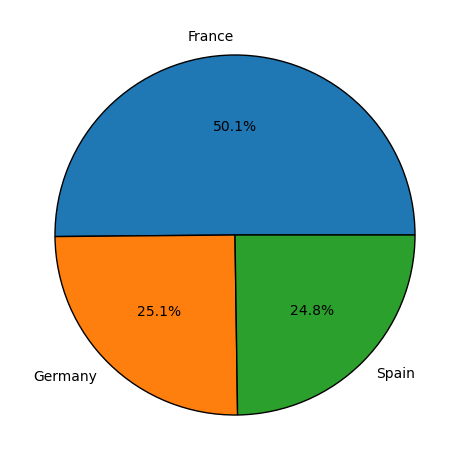

In [10]:
countries = dict(df["Geography"].value_counts())
plt.pie(countries.values(),labels=countries.keys(),wedgeprops={"edgecolor":"black"},autopct="%1.1f%%")
plt.tight_layout()

## Hur gamla är våra kunder?

In [11]:
df["Age"].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

## Hur många är aktiva vs oaktiva?

In [12]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:ylabel='members'>

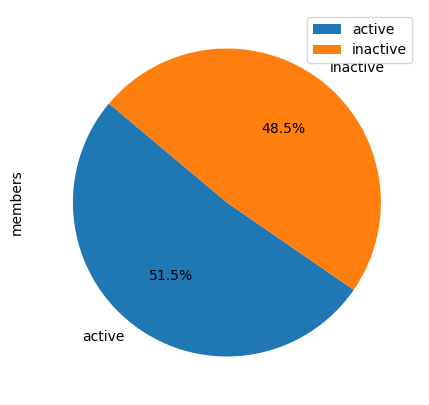

In [13]:
active_members = df[df['IsActiveMember'] == 1]['CustomerId'].count()
inactive_members = df[df['IsActiveMember'] == 0]['CustomerId'].count()
pie_df = pd.DataFrame({'members': [active_members, inactive_members]}, 
                      index=['active', 'inactive'])

 

pie_df

 

 

pie_df.plot.pie(y="members", autopct='%1.1f%%', startangle=140, figsize=(5,5))

## Printa ut alla aktiva medlemar

In [14]:
ActiveMember=df[df["IsActiveMember"]==1]
print(ActiveMember)

      CustomerId    Surname  CreditScore Geography  Gender  Age    Balance  \
0       15634602   Hargrave          619    France  Female   42       0.00   
1       15647311       Hill          608     Spain  Female   41   83807.86   
4       15737888   Mitchell          850     Spain  Female   43  125510.82   
6       15592531   Bartlett          822    France    Male   50       0.00   
8       15792365         He          501    France    Male   44  142051.07   
...          ...        ...          ...       ...     ...  ...        ...   
9986    15581736   Bartlett          673   Germany    Male   47  183579.54   
9987    15588839    Mancini          606     Spain    Male   30  180307.73   
9989    15605622   McMillan          841     Spain    Male   28       0.00   
9996    15569892  Johnstone          516    France    Male   35   57369.61   
9997    15584532        Liu          709    France  Female   36       0.00   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary

## Spara alla aktiva kunder i en ny CSV-fil 

In [15]:
ActiveMember.to_csv("ActiveMembers_clean.csv", index=False)

In [16]:
ActiveMembers_clean=pd.read_csv("ActiveMembers_clean.csv")
ActiveMembers_clean.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,Hargrave,619,France,Female,42,0.00,1,1,1,101348.88
1,15647311,Hill,608,Spain,Female,41,83807.86,1,0,1,112542.58
2,15737888,Mitchell,850,Spain,Female,43,125510.82,1,1,1,79084.10
3,15592531,Bartlett,822,France,Male,50,0.00,2,1,1,10062.80
4,15792365,He,501,France,Male,44,142051.07,2,0,1,74940.50


# diagram: 
- aktiva och oaktiva kunder 
- geografi alla kunder
- geografi på tappade kunder 

# grafer: 
- balance 
- ålder 
- 

